하이퍼 매개변수 최적화에 걸린 시간은 180.72898244857788 초입니다


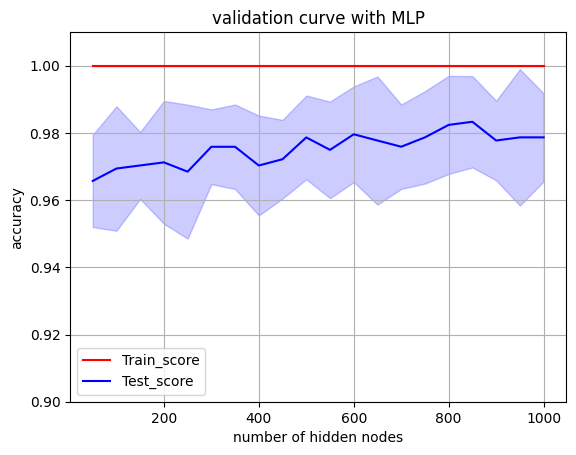


최적의 은닉층의 노드 개수는 850 개입니다

[[75.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 77.  0.  0.  0.  0.  1.  0.  4.  0.]
 [ 0.  0. 61.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 68.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0. 79.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  0. 65.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  1. 80.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 60.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. 65.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 69.]]
테스트 집합에 대한 정확률은 97.2183588317107 %입니다


In [24]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pylab as plt
import time

digit = datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)
start=time.time()
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange
                                        ,cv=10,scoring="accuracy",n_jobs=4)
end=time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다")
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(prange,train_mean,label="Train_score",color='r')
plt.plot(prange,test_mean,label="Test_score",color='b')
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color='r')
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color='b')
plt.legend(loc='best')
plt.title("validation curve with MLP")
plt.xlabel("number of hidden nodes"); plt.ylabel("accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다\n")

mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,
                       batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

res=mlp_test.predict(x_test)

conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은",accuracy*100,"%입니다")



In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

mlp_test=MLPClassifier(hidden_layer_sizes=(),learning_rate_init=0.001,
                       batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

res=mlp_test.predict(x_test)

conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은",accuracy*100,"%입니다")

c:\Users\11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 